In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

from xgboost import plot_importance
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance


from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
matplotlib.rc("font", family ="Malgun Gothic")


In [21]:
# engine: 파일명 또는 데이터에 한글 포함 -> "python" 사용
# df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", engine = "python")
df_raw = pd.read_csv("./df_t.csv")
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,Vol
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,934,1,8,2조,7.850335
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,937,1,8,2조,7.850335
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,889,1,8,3조,7.850280
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,885,1,8,3조,7.850280
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,873,1,8,1조,7.850376


In [22]:
df_raw.columns

Index(['PLATE_NO', 'ROLLING_DATE', 'SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK',
       'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR', 'Vol'],
      dtype='object')

In [27]:
for i in range(len(df_raw["FUR_NO"])):
    df_raw["FUR_NO"].iloc[i] = df_raw["FUR_NO"].iloc[i][0]
    df_raw["WORK_GR"].iloc[i] = df_raw["FUR_NO"].iloc[i][0]

In [28]:
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,Vol
0,PB562774,00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1,...,1144,116,1133,59,282,934,1,8,1,7.850335
1,PB562775,00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1,...,1144,122,1135,53,283,937,1,8,1,7.850335
2,PB562776,00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2,...,1129,116,1121,55,282,889,1,8,2,7.850280
3,PB562777,00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2,...,1152,125,1127,68,316,885,1,8,2,7.850280
4,PB562778,00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3,...,1140,134,1128,48,314,873,1,8,3,7.850376


In [29]:
df_raw_y = df_raw["SCALE"]
df_raw_x = df_raw.drop(["SCALE", "PLATE_NO", "ROLLING_DATE"], axis = 1, inplace = False)
df_raw_x =  pd.get_dummies(df_raw_x)
df_raw_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1,FUR_NO_2,FUR_NO_3,WORK_GR_1,WORK_GR_2,WORK_GR_3
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,...,0,0,0,0,1,0,0,1,0,0
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,...,0,0,0,0,1,0,0,1,0,0
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,...,0,0,0,1,0,1,0,0,1,0
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,...,0,0,0,1,0,1,0,0,1,0
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,...,0,0,0,1,0,0,1,0,0,1


In [30]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y .shape))

train data X size : (504, 95)
train data Y size : (504,)
test data X size : (216, 95)
test data Y size : (216,)


In [32]:
lgb = LGBMClassifier(n_estimators=400)
lgb.fit(df_train_x, df_train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [33]:
lgb_pred = lgb.predict(df_test_x)
accuracy_score(df_test_y, lgb_pred)

0.9814814814814815

In [36]:
lgb = LGBMClassifier(n_estimators=400)
evals = [(df_test_x, df_test_y)]
lgb.fit(df_test_x, df_test_y, early_stopping_rounds = 200, eval_metric = "logloss", eval_set = evals, verbose =True)

[1]	training's binary_logloss: 0.569857
Training until validation scores don't improve for 200 rounds
[2]	training's binary_logloss: 0.520268
[3]	training's binary_logloss: 0.480234
[4]	training's binary_logloss: 0.446792
[5]	training's binary_logloss: 0.41875
[6]	training's binary_logloss: 0.395002
[7]	training's binary_logloss: 0.374427
[8]	training's binary_logloss: 0.356624
[9]	training's binary_logloss: 0.340126
[10]	training's binary_logloss: 0.325359
[11]	training's binary_logloss: 0.310652
[12]	training's binary_logloss: 0.299678
[13]	training's binary_logloss: 0.288574
[14]	training's binary_logloss: 0.277985
[15]	training's binary_logloss: 0.267887
[16]	training's binary_logloss: 0.25772
[17]	training's binary_logloss: 0.248161
[18]	training's binary_logloss: 0.240417
[19]	training's binary_logloss: 0.232306
[20]	training's binary_logloss: 0.225599
[21]	training's binary_logloss: 0.219153
[22]	training's binary_logloss: 0.212702
[23]	training's binary_logloss: 0.206681
[24]	t

[348]	training's binary_logloss: 0.000115438
[349]	training's binary_logloss: 0.00011201
[350]	training's binary_logloss: 0.000109124
[351]	training's binary_logloss: 0.000107189
[352]	training's binary_logloss: 0.000105342
[353]	training's binary_logloss: 0.000102778
[354]	training's binary_logloss: 0.000100724
[355]	training's binary_logloss: 9.8815e-05
[356]	training's binary_logloss: 9.65381e-05
[357]	training's binary_logloss: 9.43907e-05
[358]	training's binary_logloss: 9.21975e-05
[359]	training's binary_logloss: 9.04408e-05
[360]	training's binary_logloss: 8.83253e-05
[361]	training's binary_logloss: 8.66747e-05
[362]	training's binary_logloss: 8.50816e-05
[363]	training's binary_logloss: 8.33796e-05
[364]	training's binary_logloss: 8.12819e-05
[365]	training's binary_logloss: 7.9748e-05
[366]	training's binary_logloss: 7.85939e-05
[367]	training's binary_logloss: 7.70391e-05
[368]	training's binary_logloss: 7.5991e-05
[369]	training's binary_logloss: 7.45379e-05
[370]	training

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb.fit(df_train_x, df_train_y)
lgb_pred = lgb.predict(df_test_x)
accuracy_score(df_test_y, lgb_pred)

0.9814814814814815

In [49]:
print(accuracy_score(df_test_y, lgb_pred))
print(confusion_matrix(df_test_y, lgb_pred))

0.9814814814814815
[[143   2]
 [  2  69]]


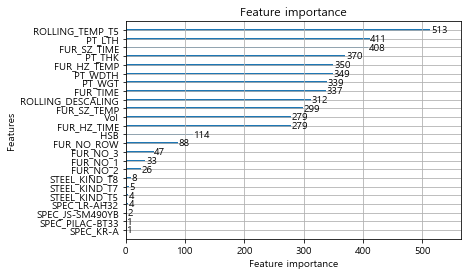

In [50]:
fig, ax = plt.subplots()
plot_importance(lgb, ax = ax)

In [51]:
#변수명
v_feature_name = df_train_x.columns

# tree.teature_importances_로 설명 변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = lgb.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("importance", ascending=False, inplace=True)

Text(0, 0.5, '설명변수')

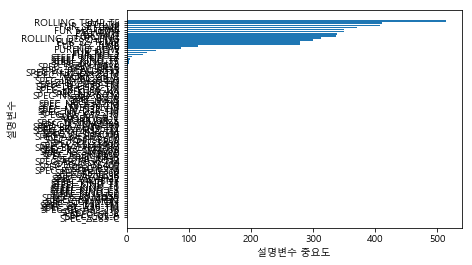

In [52]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

Text(0, 0.5, '설명변수')

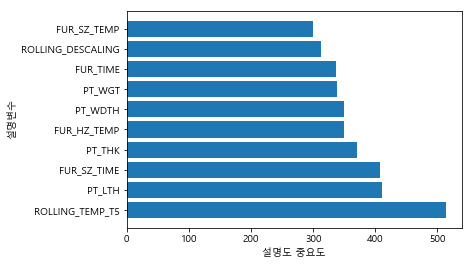

In [54]:
num = 10
df_importance.sort_values("importance", ascending = False, inplace = True)
coordinates = range(num)
plt.barh(y = coordinates, width = df_importance["importance"][:num])
plt.yticks(coordinates, df_importance["Feature"][:num])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

Text(0.5, 257.44, 'Predicted label')

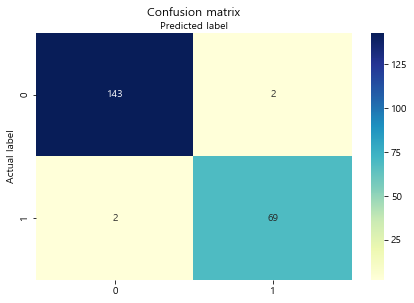

In [56]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(df_test_y, lgb_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
print("Accuracy:",metrics.accuracy_score(df_test_y, lgb_pred))
print("Precision:",metrics.precision_score(df_test_y, lgb_pred))
print("Recall:",metrics.recall_score(df_test_y, lgb_pred))

Accuracy: 0.9814814814814815
Precision: 0.971830985915493
Recall: 0.971830985915493


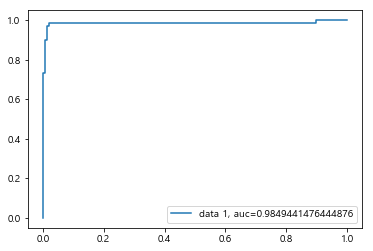

In [60]:
y_pred_proba = lgb.predict_proba(df_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(df_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(df_test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [61]:
f1_score(df_test_y, lgb_pred)

0.971830985915493